## Dogs vs Cats Image Classification(with image augmentation)

### Import packages

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Load the training and validation datasets

In [17]:
dataset = "/home/login/.keras/datasets/cats_and_dogs_filtered"
!find $dataset -type d -print

/home/login/.keras/datasets/cats_and_dogs_filtered
/home/login/.keras/datasets/cats_and_dogs_filtered/validation
/home/login/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/home/login/.keras/datasets/cats_and_dogs_filtered/validation/cats
/home/login/.keras/datasets/cats_and_dogs_filtered/train
/home/login/.keras/datasets/cats_and_dogs_filtered/train/dogs
/home/login/.keras/datasets/cats_and_dogs_filtered/train/cats


In [18]:
training = os.path.join(dataset, "train")
print(training)
validation = os.path.join(dataset, "validation")
print(validation)

val_dogs = os.path.join(validation, "dogs")
val_cats = os.path.join(validation, "cats")
train_dogs = os.path.join(training, "dogs")
train_cats = os.path.join(training, "cats")
print(train_cats)

/home/login/.keras/datasets/cats_and_dogs_filtered/train
/home/login/.keras/datasets/cats_and_dogs_filtered/validation
/home/login/.keras/datasets/cats_and_dogs_filtered/train/cats


### Understanding our data

In [19]:
os.listdir(val_dogs)[np.random.randint(100)]

'dog.2105.jpg'

In [20]:
os.listdir(train_dogs)[np.random.randint(100)]

'dog.621.jpg'

In [21]:
num_train_cats = len(os.listdir(train_cats))
print(f"The number of cats training images is: {num_train_cats}")
num_train_dogs = len(os.listdir(train_cats))
print(f"The number of dogs training images is: {num_train_dogs}", end = "\n\n")

num_val_cats = len(os.listdir(val_cats))
print(f"The number of cats validation images is: {num_val_cats}")
num_val_dogs = len(os.listdir(val_dogs))
print(f"The number of dogs validation images is: {num_val_dogs}", end = "\n\n")

total_training = num_train_cats + num_train_dogs
total_val = num_val_cats + num_val_dogs
print(f"The number of training images is: {total_training}")
print(f"The number of validation images is: {total_val}")

The number of cats training images is: 1000
The number of dogs training images is: 1000

The number of cats validation images is: 500
The number of dogs validation images is: 500

The number of training images is: 2000
The number of validation images is: 1000


#### Setting model parameters

In [22]:
BATCH_SIZE = 100
IMG_SHAPE = 150

### Data Augmentation

In [23]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

#### Flipping the images horizontally

In [29]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = training,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


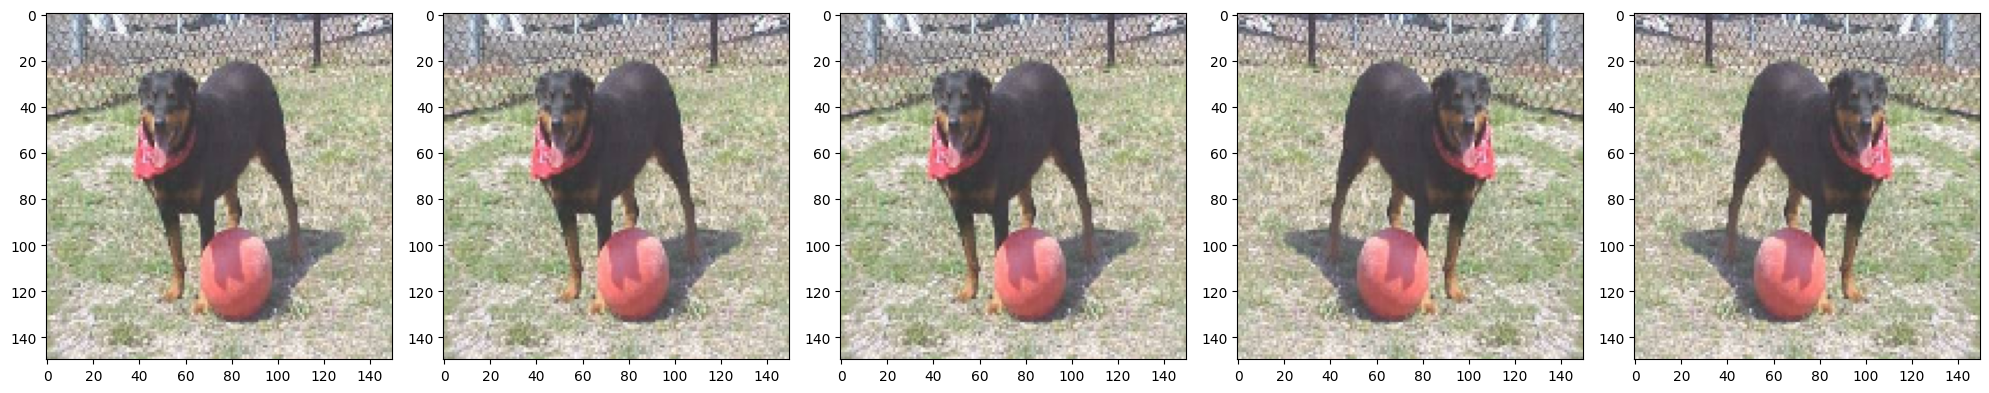

In [30]:
augmented_images = (train_data_gen[0][0][0] for i in range(5))
plotImages(augmented_images)

#### Rotating the images

In [32]:
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 45)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = training,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


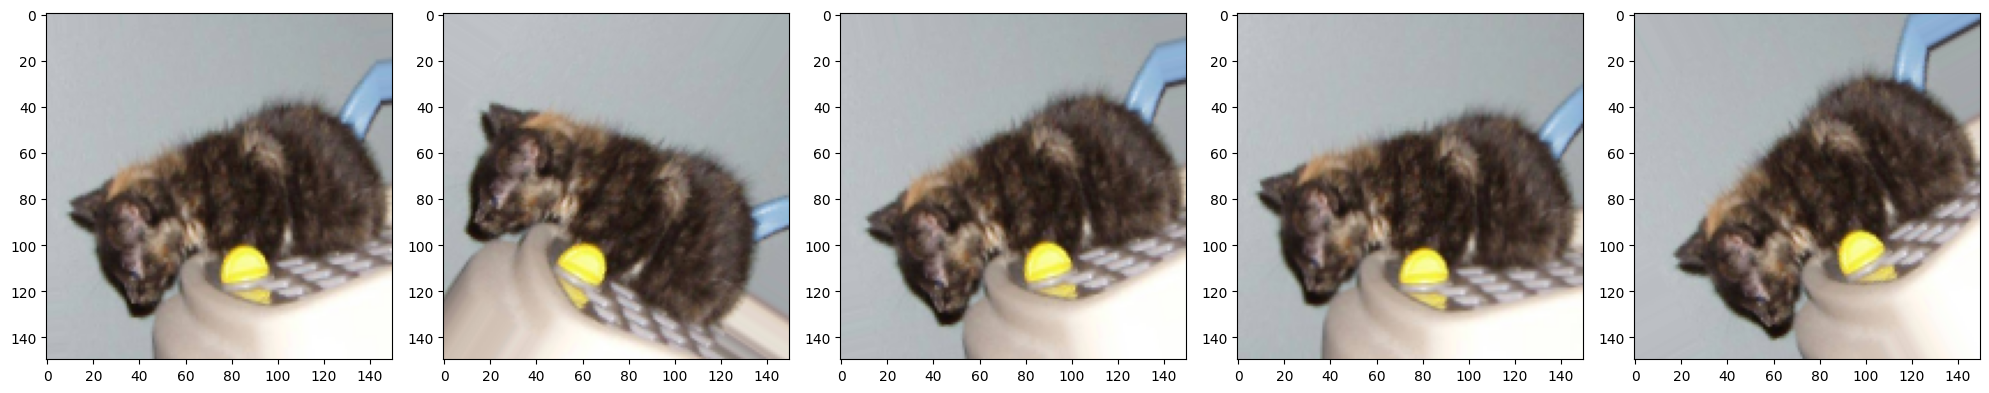

In [36]:
augmented_images = (train_data_gen[0][0][0] for i in range(6))
plotImages(augmented_images)

#### Applying Zoom

In [39]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                              directory = training,
                                              shuffle = True,
                                              target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


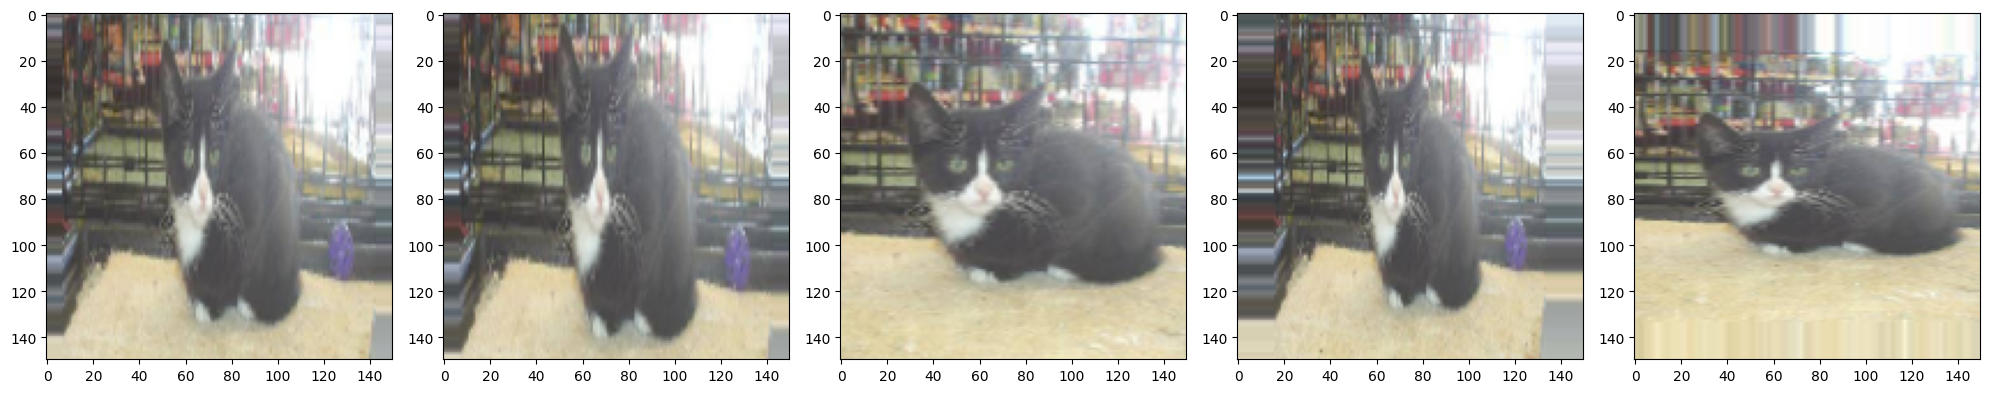

In [40]:
augmented_images = (train_data_gen[0][0][0] for i in range(5))
plotImages(augmented_images)

#### All together

In [46]:
image_gen_train = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 45,
                                    width_shift_range = 0.2,
                                    height_shift_range =  0.5,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE,
                                                    directory = training,
                                                    target_size = (IMG_SHAPE, IMG_SHAPE),
                                                    shuffle = True,
                                                    class_mode = 'binary') 

Found 2000 images belonging to 2 classes.


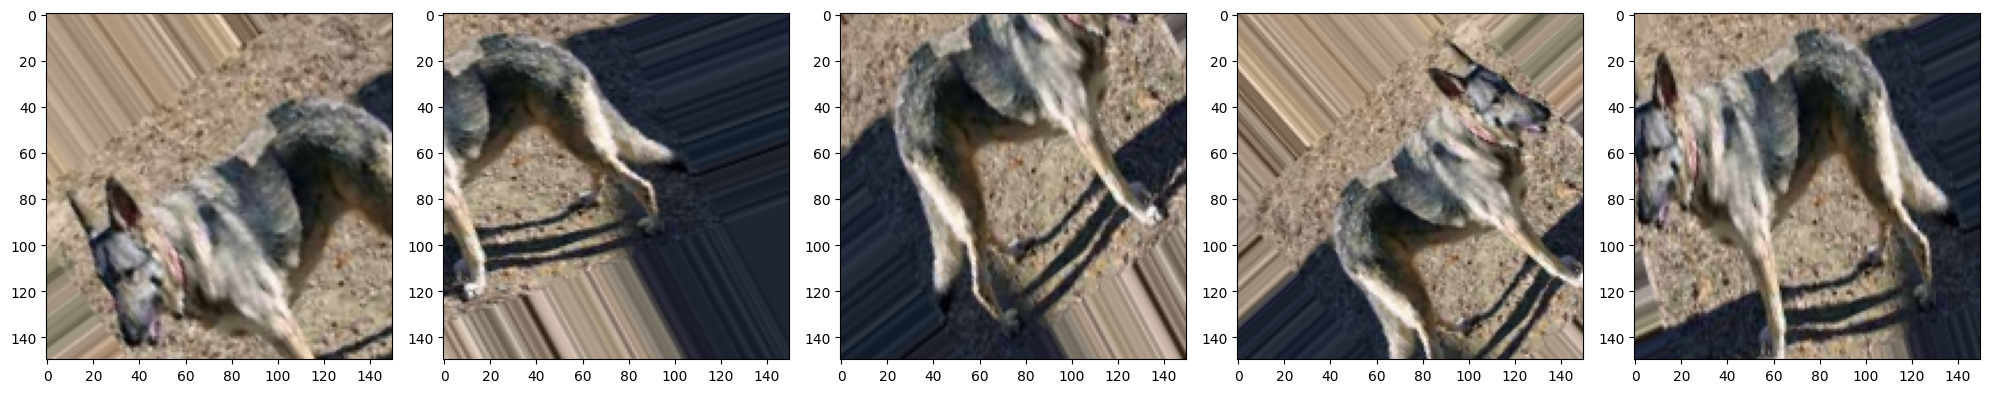

In [47]:
augmented_images = (train_data_gen[0][0][0] for i in range(5))
plotImages(augmented_images)

#### Creating Validation Data generator

In [49]:
image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = BATCH_SIZE,
                                                 directory = training,
                                                shuffle = True,
                                                target_size = (IMG_SHAPE, IMG_SHAPE),
                                                class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### Model Creation

#### Define the model

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

2023-10-13 14:03:21.292991: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2023-10-13 14:03:21.364965: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.
2023-10-13 14:03:21.414134: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75759616 exceeds 10% of free system memory.


### Compiling the model

In [58]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

#### Model Summary

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)       0

### Train the model

In [64]:
epochs = 30
history = model.fit_generator(
    train_data_gen,
steps_per_epoch = int(np.ceil(total_training / float(BATCH_SIZE))),
epochs = epochs,
validation_data = val_data_gen,
validation_steps = int(np.ceil(total_val / float(BATCH_SIZE))))

/tmp/ipykernel_3051/662481760.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
20/20 [==============================] - 213s 11s/step - loss: 0.6905 - accuracy: 0.5170 - val_loss: 0.6868 - val_accuracy: 0.5150
Epoch 2/30
20/20 [==============================] - 132s 6s/step - loss: 0.6872 - accuracy: 0.5405 - val_loss: 0.6809 - val_accuracy: 0.5640
Epoch 3/30
20/20 [==============================] - 125s 6s/step - loss: 0.6863 - accuracy: 0.5530 - val_loss: 0.6846 - val_accuracy: 0.5670
Epoch 4/30
20/20 [==============================] - 131s 7s/step - loss: 0.6846 - accuracy: 0.5520 - val_loss: 0.6770 - val_accuracy: 0.5750
Epoch 5/30
20/20 [==============================] - 130s 6s/step - loss: 0.6824 - accuracy: 0.5655 - val_loss: 0.6675 - val_accuracy: 0.5870
Epoch 6/30
20/20 [==============================] - 143s 7s/step - loss: 0.6795 - accuracy: 0.5595 - val_loss: 0.6614 - val_accuracy: 0.6160
Epoch 7/30
20/20 [==============================] - 135s 7s/step - loss: 0.6746 - accuracy: 0.5930 - val_loss: 0.6547 - val_accuracy: 0.6080
Epoch 8/30
2

### Visualization

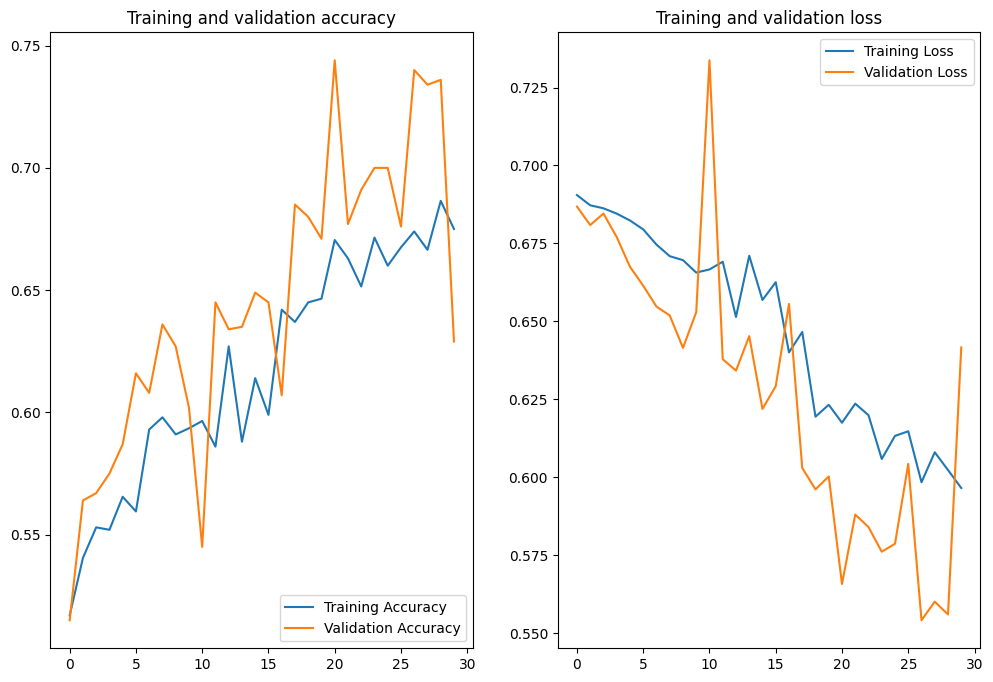

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')
plt.savefig('./foo_aug.png')
plt.show()